In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

from analysis import wl_accuracy, season_record, test_n
from data_format import create_data

In [2]:
version = 6
df = pd.read_csv(f'../data/baseball/training/game_data_v{version}.csv')

In [3]:
x_train_away, x_test_away, y_train_away, y_test_away = create_data(df, y_col='away_score', split_by='season')
x_train_home, x_test_home, y_train_home, y_test_home = create_data(df, y_col='home_score', split_by='season')

In [4]:
def generate_random_results():
    results = {'away_pred': [], 'home_pred': [], 'away_true': y_test_away, 'home_true': y_test_home}
    
    for i in range(len(y_test_away)):
        results['away_pred'].append(random.randint(0, 1))
        results['home_pred'].append(1 - results['away_pred'][i])
    
    return pd.DataFrame(results)

In [5]:
results = generate_random_results()

print('RANDOM GUESSING MODEL')
print('-' * 30)
print(f'Accuracy: {wl_accuracy(results)}%')
print('-' * 30)
season_record(df, results)

RANDOM GUESSING MODEL
------------------------------
Accuracy: 49.794238683127574%
------------------------------
Season records:
NYY: 91-71	DET: 90-72	STL: 88-74	BOS: 88-74	PHI: 88-74	
AZ: 86-76	COL: 86-76	WSH: 86-76	BAL: 86-76	TEX: 86-76	
MIL: 85-77	LAD: 84-78	HOU: 83-79	SF: 83-79	CLE: 83-79	
MIA: 82-80	CIN: 81-81	SD: 81-81	ATL: 78-84	TB: 78-84	
PIT: 77-85	TOR: 77-85	CWS: 76-86	MIN: 75-87	OAK: 74-88	
KC: 73-89	LAA: 73-89	NYM: 72-90	SEA: 72-90	CHC: 68-94	


                  0
count  10000.000000
mean      50.002008
std        1.018968
min       46.255144
25%       49.300412
50%       50.000000
75%       50.699588
max       53.580247


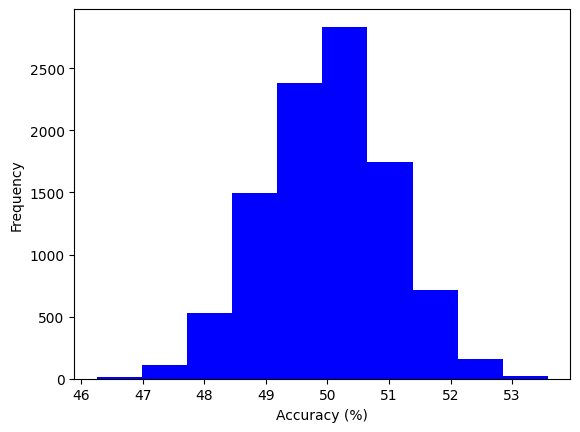

In [7]:
acc = []

for i in range(10000):
    results = generate_random_results()
    acc.append(wl_accuracy(results))

plt.xlabel('Accuracy (%)')
plt.ylabel('Frequency')

print(pd.DataFrame(acc).describe())

plt.hist(acc, color='b')
plt.show()